In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

#Stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Data info:
https://www.kaggle.com/kevinarvai/clinvar-conflicting/kernels?sortBy=hotness&group=everyone&pageSize=20&datasetId=20312

Related paper: ClinVar :improving access to variant interpretations
and supporting evidence/ : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5753237/pdf/gkx1153.pdf


The Dataset was obtained by ClinVar, a public resource used to collect information about genetic variants. ClinVar classifies each of these variants into one of three categories:

1. Likely Benign or Benign
2. VUS (A variation in a genetic sequence for which the association with disease risk is unclear)
3. Likely Pathogenic or Pathogenic

The variants were categorized via manual testing by multiple labs. Conflicting categorizations have been assigned to the CLASS column, a 1 represents a conflicting categorizations by different labs while a 0 represents a consistent categorization.

In [3]:
df = pd.read_csv('clinvar_conflicting.csv', low_memory=False)
# or we can do df = pd.read_csv('clinvar_conflicting.csv', dtype={'CHROM': str, 38: str, 40: object})

In [4]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
CHROM                 65188 non-null object
POS                   65188 non-null int64
REF                   65188 non-null object
ALT                   65188 non-null object
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
CLNDISDB              65188 non-null object
CLNDISDBINCL          76 non-null object
CLNDN                 65188 non-null object
CLNDNINCL             76 non-null object
CLNHGVS               65188 non-null object
CLNSIGINCL            76 non-null object
CLNVC                 65188 non-null object
CLNVI                 27659 non-null object
GENEINFO              59065 non-null object
MC                    58219 non-null object
ORIGIN                59065 non-null float64
SSR                   104 non-null float64
CLASS                 65188 non-null int64
Allele             

In [6]:
df.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65112
CLNDN                     0
CLNDNINCL             65112
CLNHGVS                   0
CLNSIGINCL            65112
CLNVC                     0
CLNVI                 37529
GENEINFO               6123
MC                     6969
ORIGIN                 6123
SSR                   65084
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [7]:
# drop columns with more than 50% of null values

df.replace({'':np.nan})
df = df.dropna(thresh=0.5*len(df), axis=1)
df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDN', 'CLNHGVS', 'CLNVC', 'GENEINFO', 'MC', 'ORIGIN', 'CLASS',
       'Allele', 'Consequence', 'IMPACT', 'Feature_type', 'Feature', 'BIOTYPE',
       'EXON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'STRAND', 'LoFtool', 'CADD_PHRED', 'CADD_RAW'],
      dtype='object')

In [8]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,...,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,LoFtool,CADD_PHRED,CADD_RAW
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.955563G>C,...,1/39,61,11,4,R/P,cGg/cCg,1.0,0.421,11.390,1.133255
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,not_specified,NC_000001.10:g.955597G>T,...,1/39,95,45,15,P,ccG/ccT,1.0,0.421,8.150,0.599088
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.955619G>C,...,1/39,117,67,23,V/L,Gtc/Ctc,1.0,0.421,3.288,0.069819
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.957640C>T,...,2/39,311,261,87,D,gaC/gaT,1.0,0.421,12.560,1.356499
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,not_specified,NC_000001.10:g.976059C>T,...,4/39,576,526,176,L,Ctg/Ttg,1.0,0.421,17.740,2.234711


In [9]:
#drop strings & unnecessary columns for classification
df.drop(['POS','REF','ALT', 'CLNDISDB', 'CLNDN','CLNHGVS','EXON','Amino_acids','Codons'], axis = 1)

,CHROM,AF_ESP,AF_EXAC,AF_TGP,CLNVC,GENEINFO,MC,ORIGIN,CLASS,Allele,...,Feature_type,Feature,BIOTYPE,cDNA_position,CDS_position,Protein_position,STRAND,LoFtool,CADD_PHRED,CADD_RAW
0,1,0.0000,0.00000,0.0000,single_nucleotide_variant,AGRN:375790,SO:0001583|missense_variant,1.0,0,C,...,Transcript,NM_001305275.1,protein_coding,61,11,4,1.0,0.421,11.390,1.133255
1,1,0.0000,0.42418,0.2826,single_nucleotide_variant,AGRN:375790,SO:0001819|synonymous_variant,1.0,0,T,...,Transcript,NM_001305275.1,protein_coding,95,45,15,1.0,0.421,8.150,0.599088
2,1,0.0000,0.03475,0.0088,single_nucleotide_variant,AGRN:375790,SO:0001583|missense_variant,1.0,1,C,...,Transcript,NM_001305275.1,protein_coding,117,67,23,1.0,0.421,3.288,0.069819
3,1,0.0318,0.02016,0.0328,single_nucleotide_variant,AGRN:375790,SO:0001819|synonymous_variant,1.0,0,T,...,Transcript,NM_001305275.1,protein_coding,311,261,87,1.0,0.421,12.560,1.356499
4,1,0.0000,0.00022,0.0010,single_nucleotide_variant,AGRN:375790,SO:0001819|synonymous_variant,1.0,1,T,...,Transcript,NM_001305275.1,protein_coding,576,526,176,1.0,0.421,17.740,2.234711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,MT,0.0000,0.00000,0.0000,single_nucleotide_variant,MT-ND4:4538,NaN,1.0,0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.400,4.556305
65184,MT,0.0000,0.00000,0.0000,single_nucleotide_variant,MT-ND5:4540,NaN,1.0,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.016,0.043467
65185,MT,0.0000,0.00000,0.0000,single_nucleotide_variant,MT-CYB:4519,NaN,1.0,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.860,0.027997
65186,MT,0.0000,0.00000,0.0000,single_nucleotide_variant,MT-CYB:4519,NaN,1.0,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.081,-0.055831


In [10]:
# CLASS column contains 0 or 1 value for classification

In [11]:
df.CLASS.value_counts()

0    48754
1    16434
Name: CLASS, dtype: int64

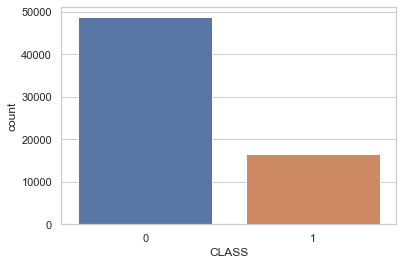

In [12]:
sns.countplot(df['CLASS'], label= "count" )

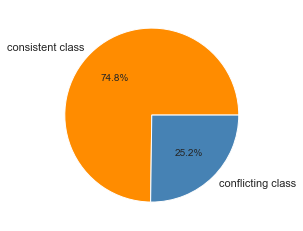

In [13]:
labels = 'consistent class' , 'conflicting class'
values = df['CLASS'].value_counts()
colors = ['darkorange','steelblue']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%.1f%%',colors =colors)
plt.show()

In [14]:
# In order to find where the most variants are located, use "CHROM" column

In [15]:
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,...,EXON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,STRAND,LoFtool,CADD_PHRED,CADD_RAW
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.955563G>C,...,1/39,61,11,4,R/P,cGg/cCg,1.0,0.421,11.390,1.133255
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,not_specified,NC_000001.10:g.955597G>T,...,1/39,95,45,15,P,ccG/ccT,1.0,0.421,8.150,0.599088
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.955619G>C,...,1/39,117,67,23,V/L,Gtc/Ctc,1.0,0.421,3.288,0.069819
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374","Myasthenic_syndrome,_congenital,_8|not_specified",NC_000001.10:g.957640C>T,...,2/39,311,261,87,D,gaC/gaT,1.0,0.421,12.560,1.356499
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,not_specified,NC_000001.10:g.976059C>T,...,4/39,576,526,176,L,Ctg/Ttg,1.0,0.421,17.740,2.234711


In [16]:
df.corr()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW
POS,1.000000,0.007003,0.007721,0.004225,0.010502,0.012061,-0.122896,0.257226,-0.005409,-0.009753
AF_ESP,0.007003,1.000000,0.851870,0.807741,-0.010724,-0.126538,-0.011551,0.027343,-0.164169,-0.148118
AF_EXAC,0.007721,0.851870,1.000000,0.805634,-0.010286,-0.121213,-0.013358,0.027831,-0.154891,-0.140803
AF_TGP,0.004225,0.807741,0.805634,1.000000,-0.011208,-0.130077,-0.014002,0.029447,-0.167057,-0.150989
ORIGIN,0.010502,-0.010724,-0.010286,-0.011208,1.000000,0.002920,-0.009731,-0.023043,0.051741,0.057404
CLASS,0.012061,-0.126538,-0.121213,-0.130077,0.002920,1.000000,-0.031369,0.000045,-0.037713,-0.053485
STRAND,-0.122896,-0.011551,-0.013358,-0.014002,-0.009731,-0.031369,1.000000,-0.160170,0.014463,0.009622
LoFtool,0.257226,0.027343,0.027831,0.029447,-0.023043,0.000045,-0.160170,1.000000,-0.038808,-0.039227
CADD_PHRED,-0.005409,-0.164169,-0.154891,-0.167057,0.051741,-0.037713,0.014463,-0.038808,1.000000,0.955003
CADD_RAW,-0.009753,-0.148118,-0.140803,-0.150989,0.057404,-0.053485,0.009622,-0.039227,0.955003,1.000000


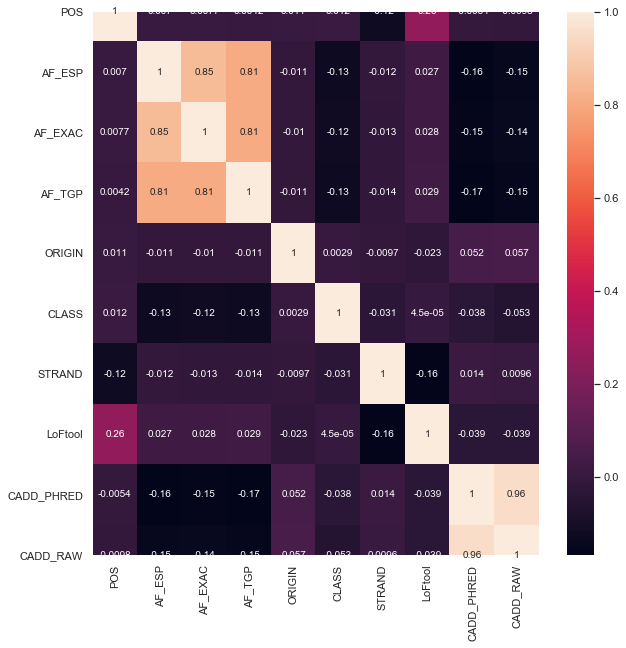

In [17]:
fig, ax = plt.subplots (figsize = (10,10))
sns.heatmap(df.corr(), annot = True, ax= ax)
plt.show()

In [18]:
# compare allele frequencies from different sources.
#CADD is a tool for scoring the deleteriousness of single nucleotide variants as well as insertion/deletions variants in the human genome.


In [19]:
#MOTIF_SCORE_CHANGE The difference in motif score of the reference and variant sequences for the TFBP

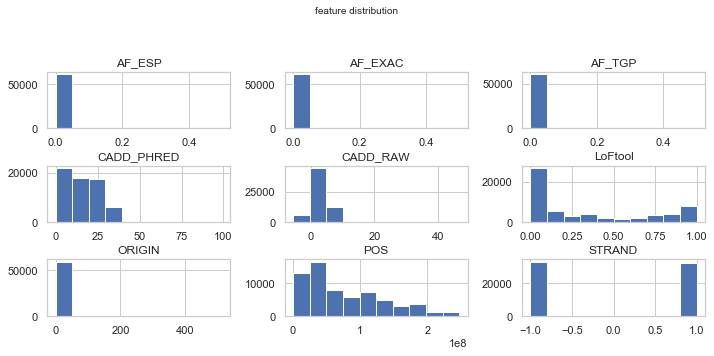

In [20]:
df.drop('CLASS', axis =1).hist(figsize = (10,5))
plt.suptitle("feature distribution", fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.8)

Text(0.5, 1.0, 'Consequence of varients with confliciting class')

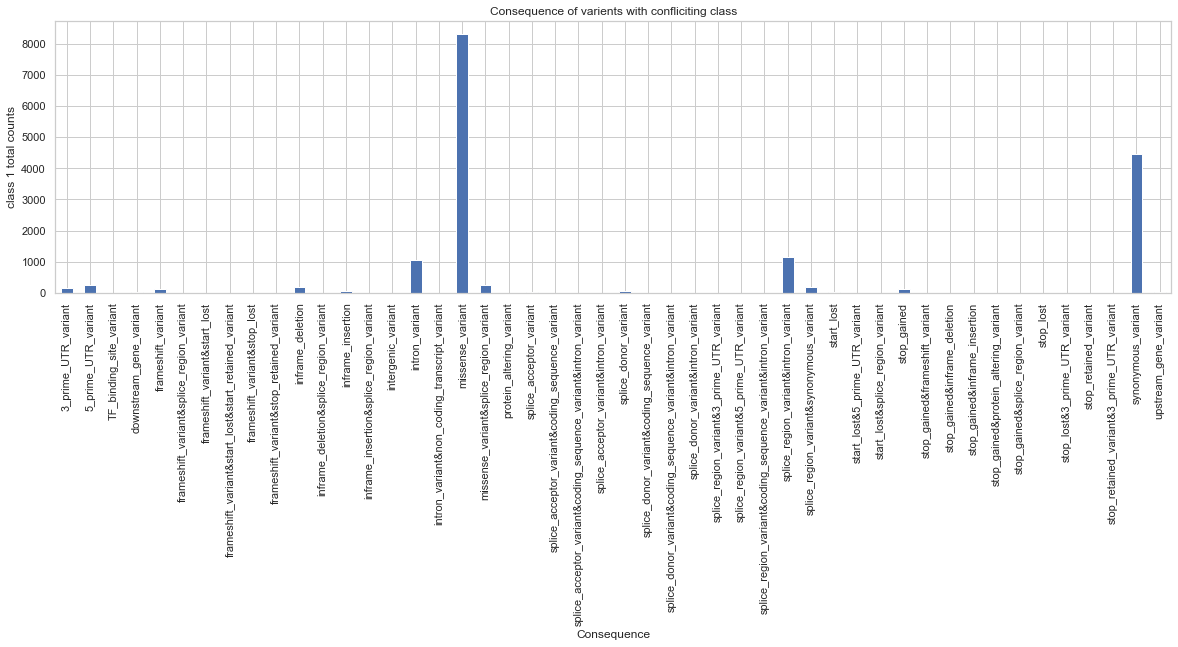

In [21]:
plt.figure(figsize = (20,5), frameon = False)
df.groupby('Consequence')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('Consequence of varients with confliciting class')

Text(0.5, 1.0, 'Chromosome location of varients with confliciting class')

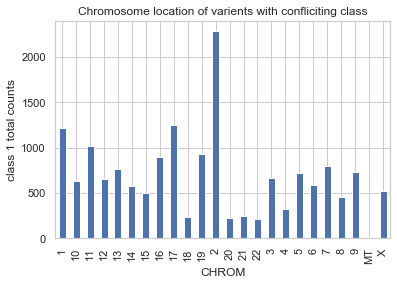

In [34]:
df.groupby('CHROM')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('Chromosome location of varients with confliciting class')

# how do I sort values here?

In [33]:
df.groupby(['CHROM','CLASS']).size()

CHROM  CLASS
1      0        3237
       1        1217
10     0        1709
       1         632
11     0        3833
       1        1013
12     0        2095
       1         655
13     0        1883
       1         763
14     0        1401
       1         573
15     0        1222
       1         503
16     0        3026
       1         901
17     0        4146
       1        1248
18     0         657
       1         239
19     0        2977
       1         934
2      0        6364
       1        2281
20     0         538
       1         221
21     0         600
       1         243
22     0         925
       1         210
3      0        1868
       1         661
4      0         887
       1         319
5      0        2919
       1         724
6      0        1576
       1         583
7      0        2069
       1         798
8      0        1399
       1         453
9      0        2012
       1         732
MT     0           5
       1          11
X      0        1406


Text(0.5, 1.0, 'mutation types with confliciting class')

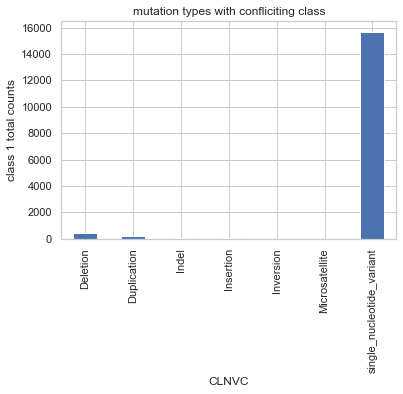

In [35]:
df.groupby('CLNVC')['CLASS'].sum().plot(kind = 'bar')
plt.ylabel('class 1 total counts')
plt.title('mutation types with confliciting class')

In [ ]:
#Classification

In [ ]:

feature_number = df[['POS','AF_ESP','AF_EXAC','AF_TGP']]